# Porto Seguro’s Safe Driver Prediction
----

This is a competition from Kaggle. It's a binary classification problem.

## Exploratory data analysis
----

### Import needed and useful libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Various configuration settings

In [63]:
pd.options.display.max_columns = 99999 # just to be sure all columns name will be displayed

### Load dataset file

In [64]:
dataset = pd.read_csv("data/train.csv")


As explained on Kaggle's competion page, missing values are set to -1.
Let's replace these with ```np.nan```, in order for Pandas to handle them correctly as missing values.

In [65]:
dataset.replace(-1, np.nan, inplace=True)

### First look at data

In [66]:
dataset.head(n=7)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1.0,4,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10.0,0.0,NaN,0,0.0,14,1.0,1,0.0,1,104,2.0,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1.0,3,1.0,0.0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6.0,1.0,NaN,0,1.0,11,1.0,1,0.0,1,99,2.0,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0


We realize that:
- column 'id' is metadata and we can ignore it for training purpose.
- column 'target' is the target feature. It's a binary type feature.
- columns from third on are descriptive features

Remove the 'id' column from the dataset

In [67]:
dataset.drop('id', axis=1, inplace=True)

Let's look at the dataset again and check the 'id' column has been removed:

In [68]:
dataset.head(n=3)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


### Important facts about the dataset

#### ** Number of datapoints **

In [69]:
dataset_size = len(dataset)
print(dataset_size)

595212


#### ** Target feature **

The target feature is labeled 'target' and it is the first column in the dataset.
It's a binary feature and its levels should be the set (0,1):

In [70]:
dataset.target.unique()

array([0, 1])

Let's display how the different levels are distributed with a countplot:

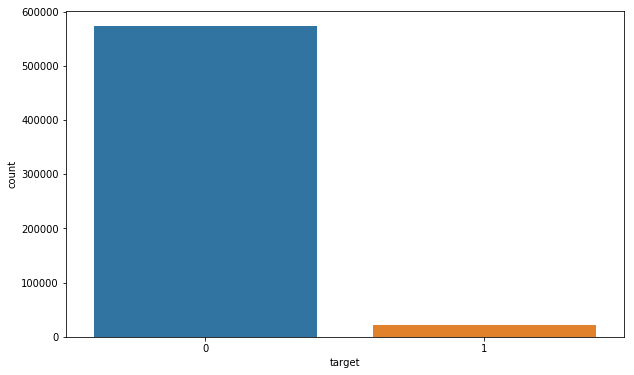

In [71]:
cp = sb.countplot(x='target', data=dataset)
cp.figure.set_size_inches(10,6)

The countplot shows that the dataset is **imbalanced** because we have many more negative datapoints than positive ones. 

Negative and positive samples numbers are:

In [72]:
neg_sample_num, pos_sample_num = dataset.target.value_counts()
print("Negative samples number: {}".format(neg_sample_num))
print("Positive samples number: {}".format(pos_sample_num))

Negative samples number: 573518
Positive samples number: 21694


Let's compute the **__Imbalance Ratio__**:

In [73]:
imbalance_ratio = float(pos_sample_num)/(pos_sample_num + neg_sample_num)
print("Imbalance ratio: {:.2f}%".format(imbalance_ratio*100))

Imbalance ratio: 3.64%


**Imbalance ratio** is about **3.64%** <br>
We'll need to take care of this significative data imbalancing when building our model.

#### ** Descriptive features **

The number of distinct descriptive features is:

In [74]:
dataset.shape[1] - 1 # remove 'target' column from the count

57

 Descriptive feature names are:

In [75]:
descriptive_feature_names = dataset.columns.values[1:]
print(descriptive_feature_names)

['ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat' 'ps_ind_05_cat'
 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin' 'ps_ind_13_bin'
 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_ind_18_bin'
 'ps_reg_01' 'ps_reg_02' 'ps_reg_03' 'ps_car_01_cat' 'ps_car_02_cat'
 'ps_car_03_cat' 'ps_car_04_cat' 'ps_car_05_cat' 'ps_car_06_cat'
 'ps_car_07_cat' 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_10_cat'
 'ps_car_11_cat' 'ps_car_11' 'ps_car_12' 'ps_car_13' 'ps_car_14'
 'ps_car_15' 'ps_calc_01' 'ps_calc_02' 'ps_calc_03' 'ps_calc_04'
 'ps_calc_05' 'ps_calc_06' 'ps_calc_07' 'ps_calc_08' 'ps_calc_09'
 'ps_calc_10' 'ps_calc_11' 'ps_calc_12' 'ps_calc_13' 'ps_calc_14'
 'ps_calc_15_bin' 'ps_calc_16_bin' 'ps_calc_17_bin' 'ps_calc_18_bin'
 'ps_calc_19_bin' 'ps_calc_20_bin']


Let's split descriptive features in categorical and continuous ones. 
According to the dataset description from Kaggle page, features whose name ends with '_bin' or '_cat' are categorical ones, while we can treat the other ones as numerical/continuous


**Categorical** feature names are:

In [76]:
categorical_feature_names = [name for name in descriptive_feature_names if name.endswith(('_bin', '_cat'))]
print(categorical_feature_names)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


**Continuous** feature names are:

In [77]:
continuous_feature_names = [name for name in descriptive_feature_names if not name.endswith(('_bin', '_cat'))]
print(continuous_feature_names)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


### Data Quality Report

Let's define a class that will help in visualizing descriptive statistics, that is central tendency and the variability, of our dataset.

In [78]:
class DataQualityReport(object):    
    '''
    Report about data basic statistics
    '''
    
    CONT_TABLE_COLS = ['count', 'missing', 'cardinality', 'min', '1st_quartile', 'mean', 'median', '3rd_quartile', 'max', 'std_dev']
    CAT_TABLE_COLS  = ['count', 'missing', 'cardinality', 'mode', 'mode_freq', 'mode_percent', '2nd_mode', '2nd_mode_freq', '2nd_mode_percent']
        
    def __init__(self, df, continuous_features, categorical_features):
        '''
        Constructor
        Parameters:
            df - pandas DataFrame object containing the dataset
            categorical_features - the list of feature names of categorical type
            continuous_features - the list of feature names of continuous type
        '''
        self._df = df
        self._continuous_features   = continuous_features
        self._categorical_features  = categorical_features

        self.cont_table = pd.DataFrame(columns=DataQualityReport.CONT_TABLE_COLS, index=continuous_features)
        self.cat_table  = pd.DataFrame(columns=DataQualityReport.CAT_TABLE_COLS, index=categorical_features)
        self.refresh()
        
    def _populate_cont_table(self, stats):
        for feature in self._continuous_features:
            feature_values = self._df[feature].values
            self.cont_table['count'][feature]           = self._df[feature].value_counts().sum()
            self.cont_table['missing'][feature]         = self._df[feature].isnull().sum()*100.0/self._df.shape[0]
            self.cont_table['cardinality'][feature]     = len(np.unique(feature_values[~np.isnan(feature_values)]))
            self.cont_table['min'][feature]             = stats[feature]['min']
            self.cont_table['1st_quartile'][feature]    = stats[feature]['25%']
            self.cont_table['mean'][feature]            = stats[feature]['mean']
            self.cont_table['median'][feature]          = stats[feature]['50%']
            self.cont_table['3rd_quartile'][feature]    = stats[feature]['75%']
            self.cont_table['max'][feature]             = stats[feature]['max']
            self.cont_table['std_dev'][feature]         = stats[feature]['std']
            
            
    def _populate_cat_table(self):
        for feature in self._categorical_features:
            feature_values = self._df[feature].values
            self.cat_table['count'][feature]           = self._df[feature].value_counts().sum()
            self.cat_table['missing'][feature]         = self._df[feature].isnull().sum()*100.0/self._df.shape[0]
            self.cat_table['cardinality'][feature]     = len(np.unique(feature_values[~np.isnan(feature_values)]))
            vc = self._df[feature].value_counts()
            self.cat_table['mode'][feature]            = vc.index[0]
            self.cat_table['mode_freq'][feature]       = vc.values[0]
            self.cat_table['mode_percent'][feature]    = float(vc.values[0])/vc.sum()*100
            if vc.shape[0] > 1:
                self.cat_table['2nd_mode'][feature]            = vc.index[1]
                self.cat_table['2nd_mode_freq'][feature]       = vc.values[1]
                self.cat_table['2nd_mode_percent'][feature]    = float(vc.values[1])/vc.sum()*100
    
    def refresh(self):
        stats = self._df.describe()
        self._populate_cont_table(stats)
        self._populate_cat_table()

Let's build a ```DataQualityReport``` object: 

In [79]:
dqr = DataQualityReport(dataset, continuous_feature_names, categorical_feature_names)

Lets' display the data quality report for continuous features:

In [80]:
dqr.cont_table

,count,missing,cardinality,min,1st_quartile,mean,median,3rd_quartile,max,std_dev
ps_ind_01,595212,0,8,0,0,1.90038,1,3,7,1.98379
ps_ind_03,595212,0,12,0,2,4.42332,4,6,11,2.6999
ps_ind_14,595212,0,5,0,0,0.012451,0,0,4,0.127545
ps_ind_15,595212,0,14,0,5,7.29992,7,10,13,3.54604
ps_reg_01,595212,0,10,0,0.4,0.610991,0.7,0.9,0.9,0.287643
ps_reg_02,595212,0,19,0,0.2,0.439184,0.3,0.6,1.8,0.404264
ps_reg_03,487440,18.1065,5012,0.0612372,0.633443,0.894047,0.801561,1.08397,4.03795,0.345413
ps_car_11,595207,0.000840037,4,0,2,2.3461,3,3,3,0.832495
ps_car_12,595211,0.000168007,183,0.1,0.316228,0.379947,0.374166,0.4,1.26491,0.0582996
ps_car_13,595212,0,70482,0.250619,0.670867,0.813265,0.765811,0.90619,3.72063,0.224588


From the above table we can figure out that:
- Mean and median are almost similar for each feature, then we could be not particularly worried about outliers.
- Data dstribution may be skewed for many features, and this is something we may have to take care of. 
- For a couple of features, namely ps_reg_03 and ps_car_14, there is a severe number of missing value which need to be considered with attention
- Statistics for ps_calc_01,ps_calc_02 and ps_calc_03 look identical and maybe we could drop two of them without loosing any information. 

Let's display the data quality report for categorical features:

In [81]:
dqr.cat_table

,count,missing,cardinality,mode,mode_freq,mode_percent,2nd_mode,2nd_mode_freq,2nd_mode_percent
ps_ind_02_cat,594996,0.0362896,4,1,431859,72.5818,2,123573,20.7687
ps_ind_04_cat,595129,0.0139446,2,0,346965,58.3008,1,248164,41.6992
ps_ind_05_cat,589403,0.975955,7,0,528009,89.5837,6,20662,3.50558
ps_ind_06_bin,595212,0,2,0,360852,60.6258,1,234360,39.3742
ps_ind_07_bin,595212,0,2,0,442223,74.2967,1,152989,25.7033
ps_ind_08_bin,595212,0,2,0,497644,83.6079,1,97568,16.3921
ps_ind_09_bin,595212,0,2,0,484917,81.4696,1,110295,18.5304
ps_ind_10_bin,595212,0,2,0,594990,99.9627,1,222,0.0372976
ps_ind_11_bin,595212,0,2,0,594205,99.8308,1,1007,0.169183
ps_ind_12_bin,595212,0,2,0,589594,99.0561,1,5618,0.943865


From the above table we can deduce that:
- data distributions are skewed for many of the features
- Some of the features have a large number of missing values, a condition that we need to fix.

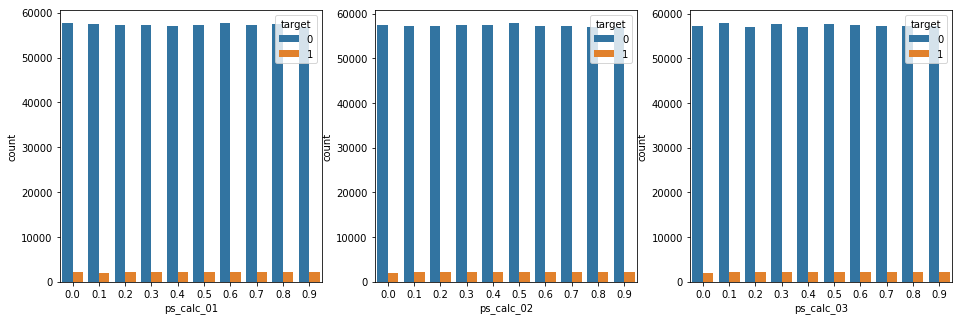

In [82]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(16,5)
sb.countplot(x=dataset.ps_calc_01, hue=dataset.target, ax=axs[0])
sb.countplot(x=dataset.ps_calc_02, hue=dataset.target, ax=axs[1])
_ = sb.countplot(x=dataset.ps_calc_03, hue=dataset.target, ax=axs[2])

Not only above distributions look almost identical, but it looks like for each level, there is an identical dstribution of false and positive values of target feature, which means we have no gain in information from these features and we may simply remove them.
Let's remove duplicates ones:

In [83]:
dataset.drop(['ps_calc_02', 'ps_calc_03'], axis=1, inplace=True)

## Data preparation
----

### Handling missing values

In this phase, we are going to handle missing values. This can be done in various ways:
- Replacing them with meaningful ones. How to chose these?
- Removing the samples with missing values, if this makes sense
- Dropping the feature fro which values are missing, if this is happening for too many samples.

Let's start with a simple strategy and let's adopt more sofisticated ones if needed.

#### Strategy 1

- Let's drop features that have missing values for more than 40% of the data points
- Let's replace missing values with median/mode for all of the remaining features

In [84]:
dataset_clean1 = dataset.copy()

Any change will be done on this new dataframe, preserving the orginal one.

Following, the list of features with missing values, and their occurrences:

In [85]:
features_with_missing_data = { i : dqr.cont_table.missing[i]  for i in dqr.cont_table.index if dqr.cont_table.missing[i] > 0}
features_with_missing_data.update(
    { i : dqr.cat_table.missing[i]  for i in dqr.cat_table.index if dqr.cat_table.missing[i] > 0})

In [86]:
for f in features_with_missing_data:
    print("{0: <16}: {1:.2f}%".format(f, features_with_missing_data[f]))

ps_reg_03       : 18.11%
ps_car_11       : 0.00%
ps_car_12       : 0.00%
ps_car_14       : 7.16%
ps_ind_02_cat   : 0.04%
ps_ind_04_cat   : 0.01%
ps_ind_05_cat   : 0.98%
ps_car_01_cat   : 0.02%
ps_car_02_cat   : 0.00%
ps_car_03_cat   : 69.09%
ps_car_05_cat   : 44.78%
ps_car_07_cat   : 1.93%
ps_car_09_cat   : 0.10%


Let's start from features whose missing value percentage is more than 40%:

In [87]:
miss_gt_40 = [f for f in features_with_missing_data if features_with_missing_data[f] > 40.0]
print(miss_gt_40)

['ps_car_03_cat', 'ps_car_05_cat']


Let's remove above feature, as stated before:

In [88]:
dataset_clean1.drop(miss_gt_40, axis=1, inplace=True)

Let's handle now features whose missing value percentage is less than or equal to 40%:

In [89]:
miss_lt_equal_40 = [f for f in features_with_missing_data if features_with_missing_data[f] <= 40.0]
print(miss_lt_equal_40)

['ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_14', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_07_cat', 'ps_car_09_cat']


Let's use central values computed in data quality report for each feature as replacements for missing values

In [90]:
def central_value(feature, dqr):
    if feature.endswith(('_cat', '_bin')):
        return dqr.cat_table['mode'][feature]
    else:
        return dqr.cont_table['median'][feature]
    
def replace_with_central_value(data, features, dqr):
    data.fillna({f: central_value(f, dqr) for f in features}, inplace=True)


In [91]:
replace_with_central_value(dataset_clean1, miss_lt_equal_40, dqr)

In [92]:
dataset_clean1.isnull().sum().sum()

0

### Dealing with imbalanced data

There are many techniques to address the imbalanced data issue. Let's adopt a simple one, then switch to a more complex one if needed.

#### Random undersampling with prototype selection

In [93]:
from imblearn.under_sampling import RandomUnderSampler

In [94]:
rus = RandomUnderSampler()

In [95]:
X = dataset_clean1.iloc[:, 1:]
y = dataset_clean1.iloc[:, 0]
X_rus, y_rus  = rus.fit_sample(X, y)
#dataset_clean1_rus = pd.DataFrame()

In [96]:
X_rus.shape

(43388, 53)

In [97]:
y_rus.shape

(43388,)

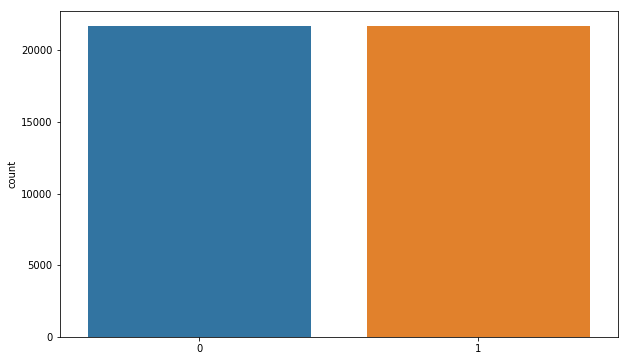

In [98]:
cp = sb.countplot(x=y_rus)
cp.figure.set_size_inches(10,6)

In [99]:
y_rus = np.reshape(y_rus, (y_rus.shape[0], 1))

In [100]:
type(X_rus)

numpy.ndarray

In [101]:
y_rus.shape

(43388, 1)

### Train set and test set splitting

In [102]:
from sklearn.model_selection import  train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus,
                                                    random_state=42,
                                                    stratify=y_rus, 
                                                    test_size=0.25)

## Model selection
---

Let's investigate a few models

### Decision trees

Let's split X_train into the actual training set and the cross validation test set that i'll call dev test set:

In [104]:
X_devtrain, X_devtest, y_devtrain, y_devtest = train_test_split(X_train, y_train,
                                                    random_state=42,
                                                    stratify=y_train, 
                                                    test_size=0.10)

In [105]:
from sklearn import tree

In [106]:
clf = tree.DecisionTreeClassifier()

In [107]:
clf = clf.fit(X_devtrain, y_devtrain)

In [108]:
pred_devtrain = clf.predict(X_devtrain)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
devtrain_score = accuracy_score(y_devtrain, pred_devtrain)
print(devtrain_score)

1.0


In [111]:
pred_devtest = clf.predict(X_devtest)
devtest_score = accuracy_score(y_devtest, pred_devtest)
print(devtest_score)

0.530568356375


In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(y_devtrain, pred_devtrain)

array([[14643,     0],
       [    0, 14643]])

In [114]:
confusion_matrix(y_devtest, pred_devtest)

array([[868, 759],
       [769, 859]])

In [115]:
clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [116]:
clf = clf.fit(X_devtrain, y_devtrain)
pred_devtrain = clf.predict(X_devtrain)
devtrain_score = accuracy_score(y_devtrain, pred_devtrain)
print(devtrain_score)
pred_devtest = clf.predict(X_devtest)
devtest_score = accuracy_score(y_devtest, pred_devtest)
print(devtest_score)

0.59618930547
0.561290322581


In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
clf_rf = RandomForestClassifier(n_estimators=30, max_depth=10, min_samples_leaf=3)
y_devtrain2 = y_devtrain.reshape((y_devtrain.shape[0],))
clf_rf.fit(X_devtrain, y_devtrain2)
pred_devtrain = clf_rf.predict(X_devtrain)
pred_devtest = clf_rf.predict(X_devtest)
devtrain_score = accuracy_score(y_devtrain2, pred_devtrain)
print(devtrain_score)
pred_devtest = clf.predict(X_devtest)
devtest_score = accuracy_score(y_devtest, pred_devtest)
print(devtest_score)

0.70897357099
0.561290322581


In [119]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [120]:
categorical_features_idx = [X.columns.get_loc(f) for f in X if f.endswith('_cat')]
categorical_features_idx

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [121]:
X.columns[categorical_features_idx]

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [ ]:
pipe_dt = make_pipeline(OneHotEncoder(categorical_features=categorical_features_idx,
                                     sparse=False),
    RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5))
    #tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=20))

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dt, 
                                                        X=X_train, y=y_train.reshape((y_train.shape[0],)),
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10, n_jobs=1)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
p=plt.plot(train_sizes, train_scores_mean)
p=plt.plot(train_sizes, test_scores_mean)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


pipe_lr = make_pipeline(OneHotEncoder(categorical_features=categorical_features_idx,
                                     sparse=False), 
                        StandardScaler(), LogisticRegression(penalty='l2', 
                                                             random_state=42))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, 
                                                        X=X_train, y=y_train.reshape((y_train.shape[0],)),
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10, n_jobs=1)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
p=plt.plot(train_sizes, train_scores_mean)
p=plt.plot(train_sizes, test_scores_mean)

### Trying oversampling for better results